# Homework 7 Flow, Bifurcation and Linearization





# Problem 1 Flow and Bifurcation

1. You are studying energy potential diagrams and come across the following equation:
$\frac{dx}{dt} = rx+x^3-x^5$. Let **r = -2** and use the code cell below to plot the flow figure. Be sure to label axes. Some quick hints:
- You will likely have to zoom into the figure to see the important points. Consider using ylim and xlim.
- It may help to draw an abline at y = 0. Look up the command "axhline".

Text(0, 0.5, 'dx/dt')

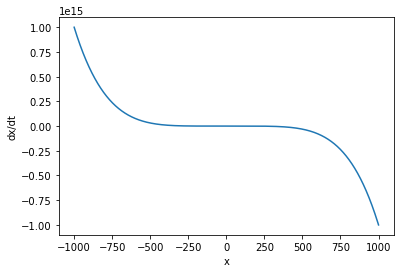

In [42]:
import matplotlib.pyplot as plt
import numpy as np

r = -2

def func(x, r, t):
    dx = r*x + x**3 - x**5
    return dx

xsteps = np.linspace(-1000, 1000, 100000)
timesteps = np.linspace(0, 1000, 100000)

plt.plot(xsteps, func(xsteps, r, timesteps))
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('dx/dt')

In the cell below answer : How many steadystates are there and what are their *approximate* values (i.e. zoom into the figure and read them from the diagram)? Describe the stability of each steady state.


There is one steady state at (0, 0). It is stable.

To ensure we understand what the flow diagram means in terms of the dynamic changes in the value of x over time, please use an ode solver to simulate the ODE with $x_0 = 0.8$. Plot the value of x versus time in the space below. For the simulation time and time step size, choose appropriate numbers such that the plot is smooth and the figure clearly shows the approach to steadystate.

(-50.0, 1050.0)

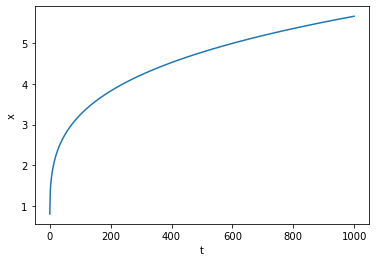

In [43]:
from scipy.integrate import odeint

x = odeint(func, y0 = 0.8, t = timesteps, args = (r,))

plt.plot(timesteps, x)
plt.xlabel('t')
plt.ylabel('x')
plt.xlim()

Now replot the flow diagram for **r = -.2**.

Text(0, 0.5, 'dx/dt')

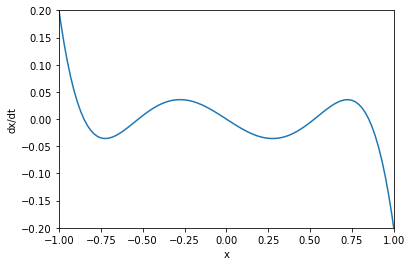

In [44]:
r = -.2
plt.plot(xsteps, func(xsteps, r, timesteps))
plt.xlim(-1, 1)
plt.ylim(-0.2, 0.2)
plt.xlabel('x')
plt.ylabel('dx/dt')

In the cell below answer : How many steadystates are there and what are their approximate values (i.e. zoom into the figure and read them from the diagram)? Describe the stability of each steady state.

5 steadystates: -0.8: stable, -0.5: unstable, 0: stable, 0.5: unstable, 0.8: stable

To ensure we understand what the flow diagram means in terms of the dynamic changes in the value of x over time, please use an ode solver to simulate the ODE with $x_0 = 0.8$. Plot the value of x versus time in the space below.

Text(0, 0.5, 'x')

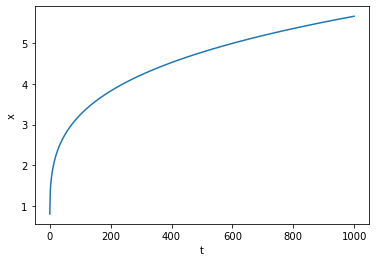

In [45]:
x = odeint(func, y0 = 0.8, t = timesteps, args = (r,))

plt.plot(timesteps, x)
plt.xlabel('t')
plt.ylabel('x')

Last time! Replot the flow diagram for **r = 2**.

Text(0, 0.5, 'dx/dt')

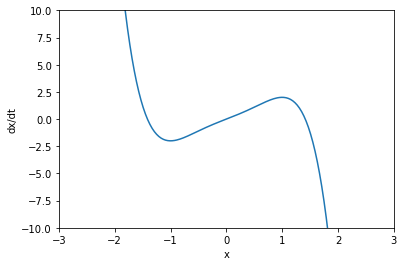

In [46]:
r = 2
plt.plot(xsteps, func(xsteps, r, timesteps))
plt.xlim(-3, 3)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('dx/dt')

In the cell below answer : How many steadystates are there and what are their approximate values (i.e. zoom into the figure and read them from the diagram)? Describe the stability of each steady state.

3 steadystates: -1.5: stable, 0: unstable, 1.5: stable

To ensure we understand what the flow diagram means in terms of the dynamic changes in the value of x over time, please use an ode solver to simulate the ODE with  $x_0 = 0.8$. Plot the value of x versus time in the space below.

Text(0, 0.5, 'x')

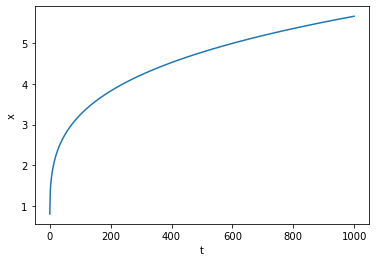

In [47]:
x = odeint(func, y0 = 0.8, t = timesteps, args = (r,))

plt.plot(timesteps, x)
plt.xlabel('t')
plt.ylabel('x')
# plt.xlim(0, 100)
# plt.ylim(0, 7E-18)

Putting everything together, the goal here is to emphasize that flow on a line makes it easy to understand first order ODE's steadystate and the system behavior near steadystate. But we also see here how quickly the number of steadystates and their stability changes with our choice of parameter values. 

Below, comment on how uncertainty in the value of r may impact your system. 

# Problem 2 Linearization

You're given the nonlinear, first-order, time-invariant ODE $\frac{dy}{dt} = sin(y)$.

1. In the space below, plot the flow diagram for the ODE. 

Text(0, 0.5, 'dy/dt')

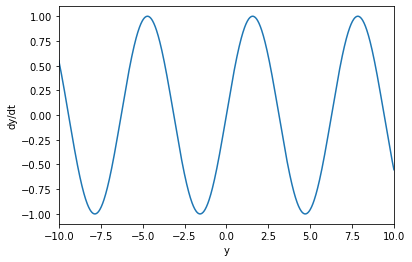

In [59]:
def func(y, t):
    dy = np.sin(y)
    return dy

ysteps = np.linspace(-1000, 1000, 100000)
timesteps = np.linspace(0, 1000, 100000)

plt.plot(ysteps, func(ysteps, timesteps))
plt.xlim(-10, 10)
plt.xlabel('y')
plt.ylabel('dy/dt')

2. In the space below, type out the equation for the linearized form of our ODE when it is linearized about the lowest, positive-valued, stable steadystate.

dy/dt = (-1)*y + $\pi$

3. We want to compare the responses of our linearized model to our original nonlinear model. On a single figure, plot the time response of both models when starting at an initial conditions of $y_0 = 3$. Clearly indicate which lines represent which ODEs.

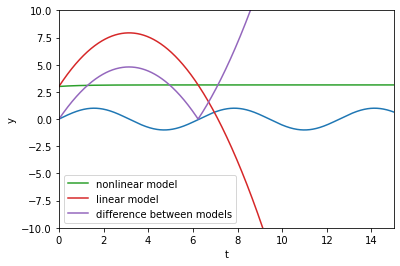

In [63]:
import math

y = odeint(func, y0 = 3, t = timesteps)

def linfunc(y, t):
    dylin = (-1)*t + 3.14
    return dylin

ylin = odeint(linfunc, y0 = 3, t = timesteps)
modeldif = abs(y-ylin)

plt.clf()
plt.plot(ysteps, func(ysteps, timesteps))
plt.plot(ysteps, linfunc(ysteps, timesteps))
plt.plot(timesteps, y, label = 'nonlinear model')
plt.plot(timesteps, ylin, label = 'linear model')
plt.plot(timesteps, modeldif, label = 'difference between models')
plt.xlabel('t')
plt.ylabel('y')
plt.xlim(0, 15)
plt.ylim(-10, 10)
plt.legend()
plt.show()

(-10.0, 10.0)

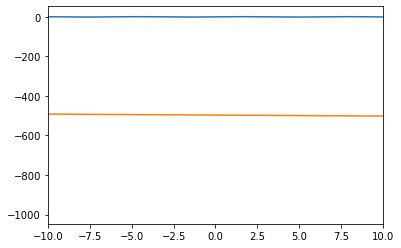

In [64]:
plt.clf()
plt.plot(ysteps, func(ysteps, timesteps), label = 'nonlinear model')
plt.plot(ysteps, linfunc(ysteps, timesteps), label = 'linear model')
plt.xlim(-10, 10)

3. Let's test one more initial condition. On a single figure, plot the time response of both models when starting at an initial conditions of $y_0 = 1$. Clearly indicate which lines represent which ODEs.

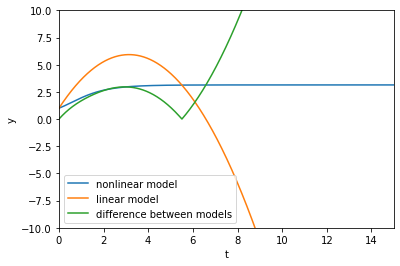

In [65]:
y = odeint(func, y0 = 1, t = timesteps)
ylin = odeint(linfunc, y0 = 1, t = timesteps)
modeldif = abs(y-ylin)

plt.plot(timesteps, y, label = 'nonlinear model')
plt.plot(timesteps, ylin, label = 'linear model')
plt.plot(timesteps, modeldif, label = 'difference between models')
plt.xlabel('t')
plt.ylabel('y')
plt.xlim(0, 15)
plt.ylim(-10, 10)
plt.legend()

4. Discuss the results from parts 3 and 4. Are the time trajectories of the linearized and nonlinear models similar? When should they be and when should they not be similar?

